In [1]:
library(tidyverse)
options(repr.plot.height=4, repr.plot.width=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lecture 02: More on ``ggplot``

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**

After today's lecture you will understand how to:

* Use [position adjustments](#Position-Adjustments), [coordinate systems](#Coordinate-Systems) and [scale transformations](#Scale-transformations) to make plots more interpretable.
* Employ these ideas on a real data set.

</div>

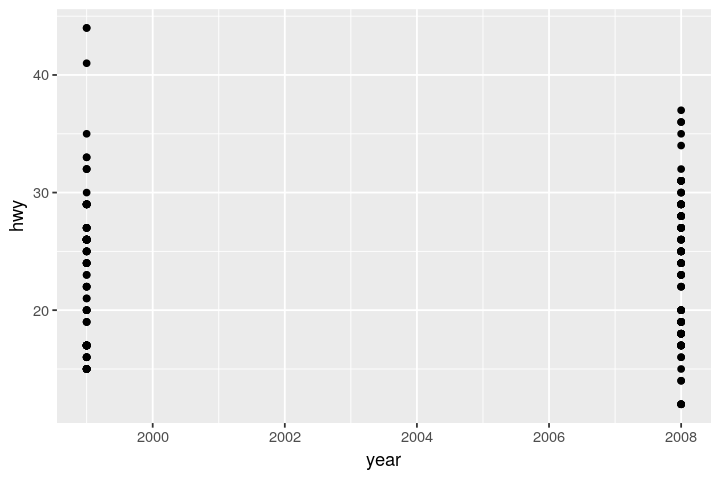

In [2]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_point(mapping = aes(x=year, y=hwy))

This doesn't quite do what we want. Since we have only a few different values of year in our data set, we need to tell R that we want to temporarily think of it as discrete. The way to do this is by converting **year** to a factor:

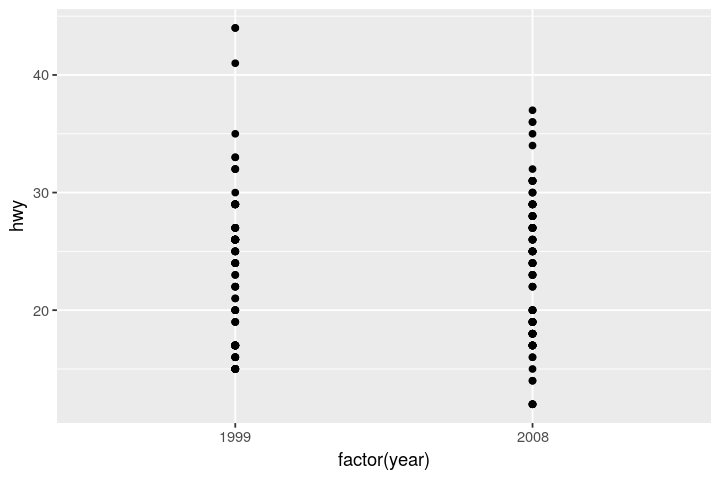

In [3]:
ggplot(data = mpg) +  # year vs. hwy.
    geom_point(mapping = aes(x=factor(year), y=hwy))  # convert year to factor

This is better but still not very interpretable. What we want to do is visualize the distribution of `hwy` for each year.

Use a *boxplot* to generate the following graphic:
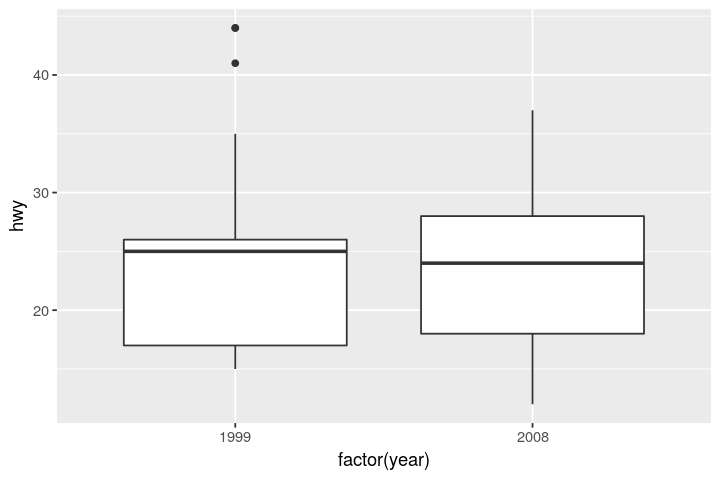

In [4]:
# Your code here

Surprisingly, the median highway gas mileage went down from 1999 to 2008. Why might this be? Let's try plotting the fraction of car types represented in each data set. To do this we will use use a new geom, `geom_bar`. This takes one aesthetic called `x=` and makes a plot with the number of times that each (discrete) value of `x` appears in the data set. Here is an example which counts the number of cars in each class:

Use `geom_bar` to generate a plot of the counts of the number of different classes of automobiles in `mpg`:
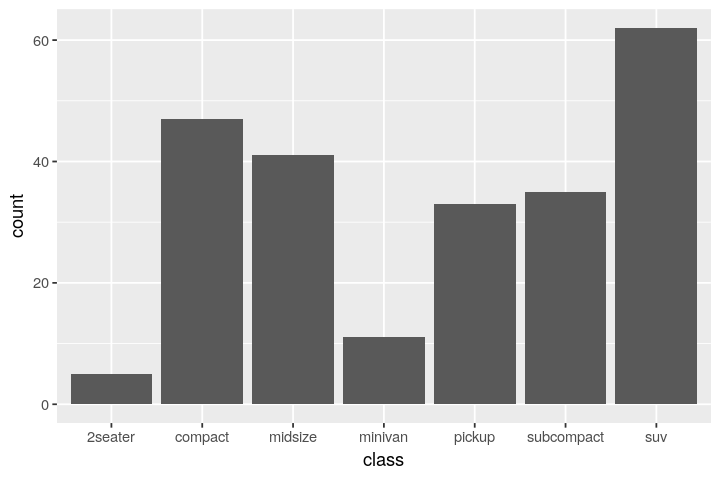

In [5]:
# Your code here

To understand whether a difference in the types of autos produced is responsible for the change in gas mileage, it would be more useful if we could visualize the number of classes by each year.

Make a bar plot of the number of different auto classes in 1999 vs. 2008:
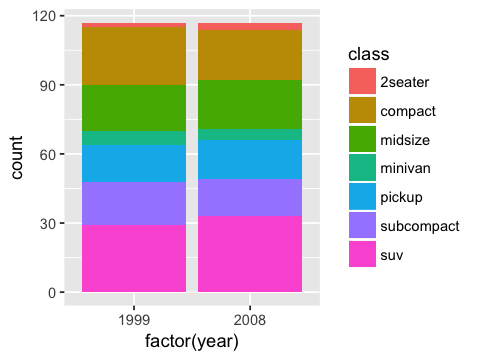

In [6]:
# Your code here

## Other geoms
There are many other geoms in ``ggplot()`` (over 30). We will not have time to go over them all. If you want to learn about other types of plots and geoms, check out this [graphical glossary](https://www.r-graph-gallery.com/portfolio/ggplot2-package/). The nice thing about plotting using ``ggplot`` is that can completely alter the type and appearance of your plot by simply switching to another type of geom.

The list of available aesthetic mappings can vary from geom to geom. 

`geom_point` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `shape`
* `size`
* `stroke`

`geom_smooth` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `linetype`
* `size`
* `weight`
* `ymax`
* `ymin`

Let us create a **bar chart** using the **cut** variable. Recall that this is done by the ``geom_bar`` geometry.

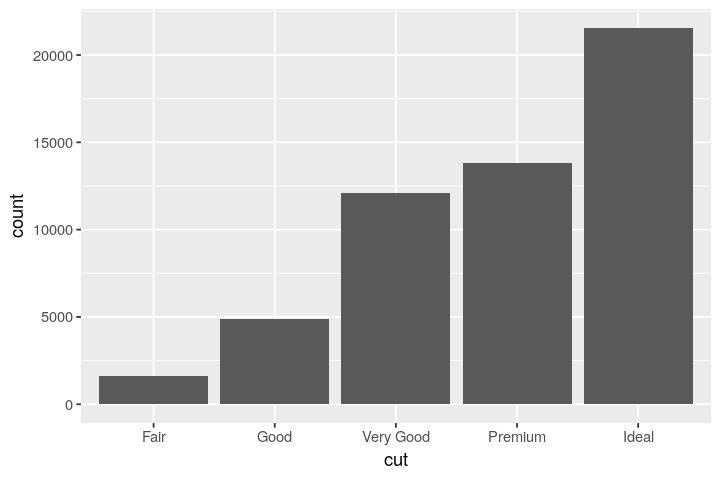

In [7]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

This aesthetic looks different than what we have seen before. We didn't supply a `y` variable, and the `y` variable in the plot, **count**, is not even a variable in our data set. 

So we see that a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemetries and statistical transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

These are the defaults. Although it is usually unnecessary, they can be overridden.

There are several transformations that `geom_bar` is doing internally to create the plot above. One way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

In [8]:
my_tibble <- select(diamonds, cut, price) %>%
    group_by(cut) %>%
    summarise(total_price_millions = sum(price)/1e6)
print(my_tibble)

# A tibble: 5 x 2
  cut       total_price_millions
  <ord>                    <dbl>
1 Fair                      7.02
2 Good                     19.3 
3 Very Good                48.1 
4 Premium                  63.2 
5 Ideal                    74.5 


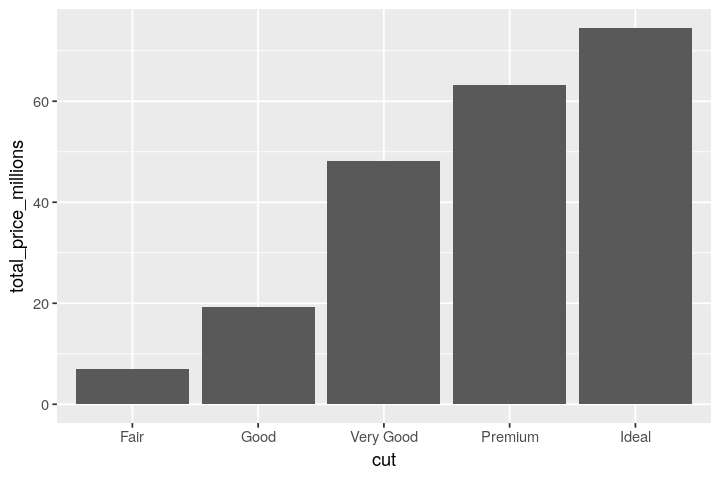

In [9]:
ggplot(data = my_tibble) +
    geom_bar(mapping = aes(x = cut, y = total_price_millions), stat = "identity")

The "identity" statistic comes up a lot, so it has a shortcut, `geom_col`:

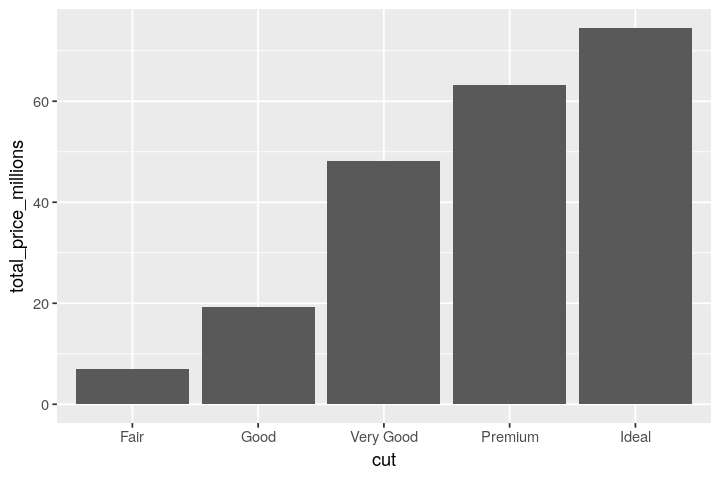

In [10]:
ggplot(data = my_tibble) +
    geom_col(mapping = aes(x = cut, y = total_price_millions)) # same as geom_bar(..., stat="identity")

### Exercise
The `tribble` command can be used to input data by hand:

In [11]:
tribble(
    ~x, ~y, ~z,
    1,  2,  "a",
    4,  5,  "b",
    5,  7,  "c",
)

x,y,z
1,2,a
4,5,b
5,7,c


Use `tribble()` and `geom_col()` to reproduce the following plot:
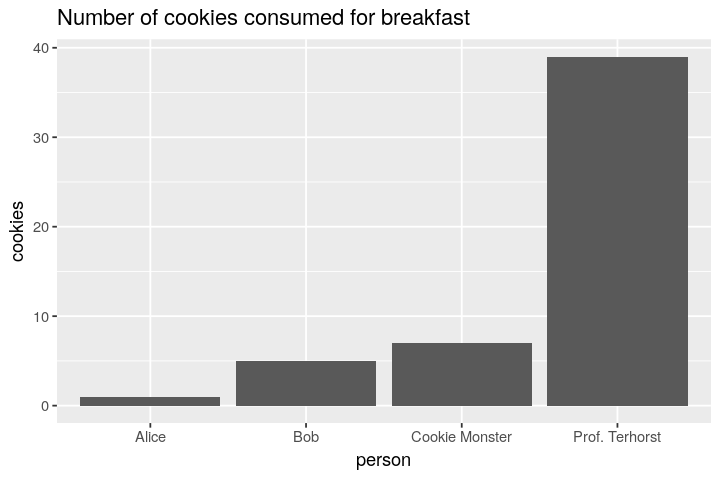

## Position Adjustments
As we saw in the previous exercise, we can use the `fill=` parameter to color the bars of a plot:

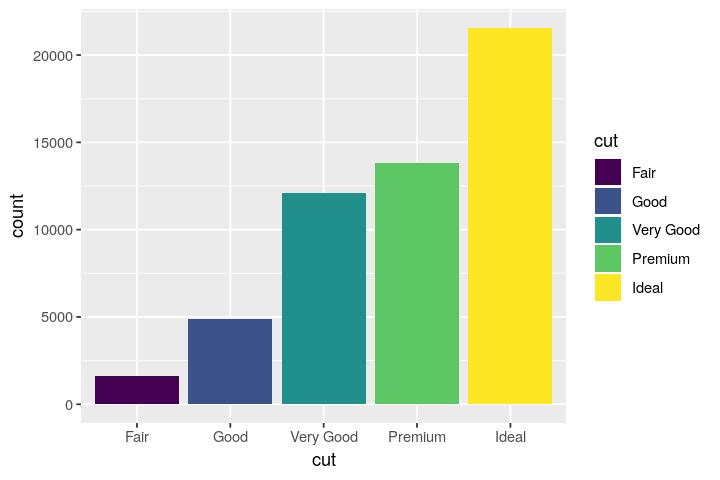

In [12]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

What happens when we map the `fill` aesthetic to some variable other than **cut**, say **clarity**?

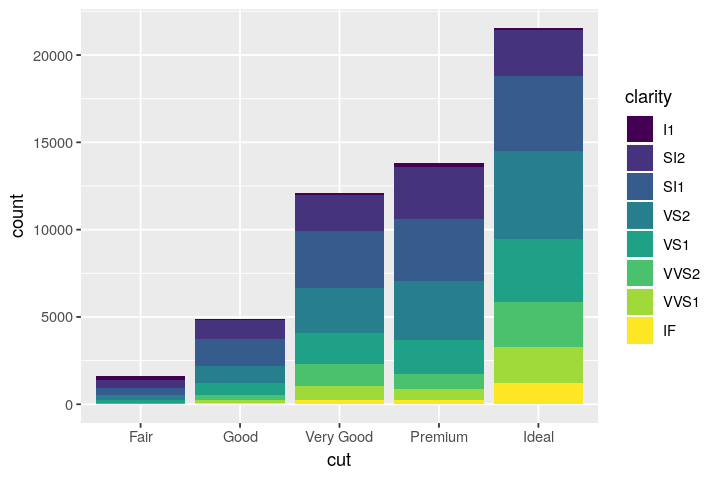

In [13]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

If stacking is not the behavior you want, you can set the **position** argument to something other than `"stack"`.

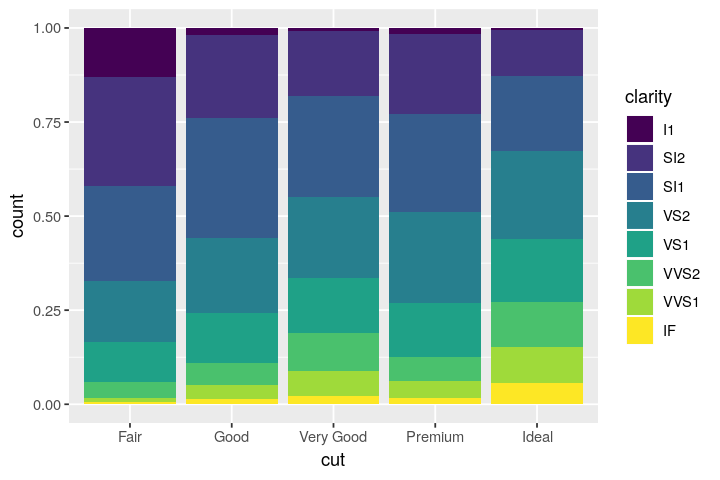

In [14]:
ggplot(data = diamonds) + 
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") # stacks but shows proportions

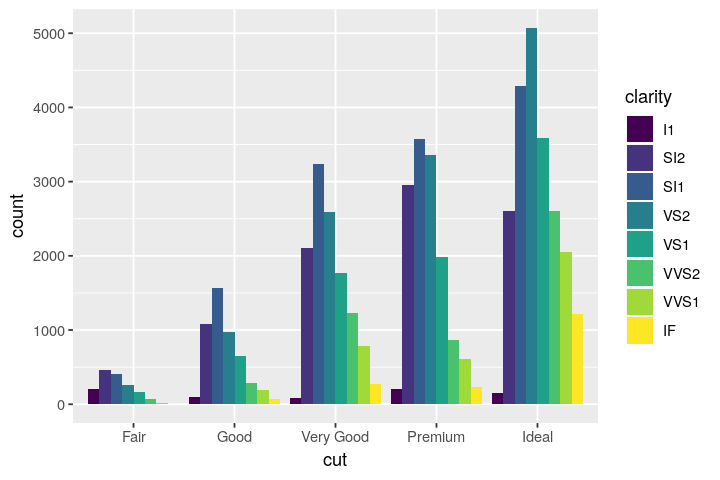

In [15]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") # put the bars side by side

There is a position adjustment that is less useful in bar plots but can be useful in scatter plots.

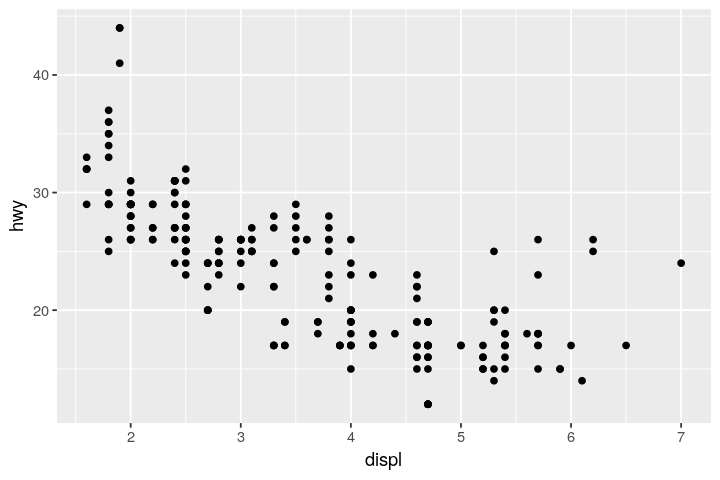

In [16]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

It's difficult to see but there are overlapping points in the plot above. For example, the lowest point (point with the lowest `hwy` value) actually consists of 5 overlapping points: 2 SUVs and 3 pickup trucks.

In [17]:
filter(mpg, hwy == 12)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


Let's see if the overlapping points show up when we use the **jitter** position adjustment in a normal scatter plot.

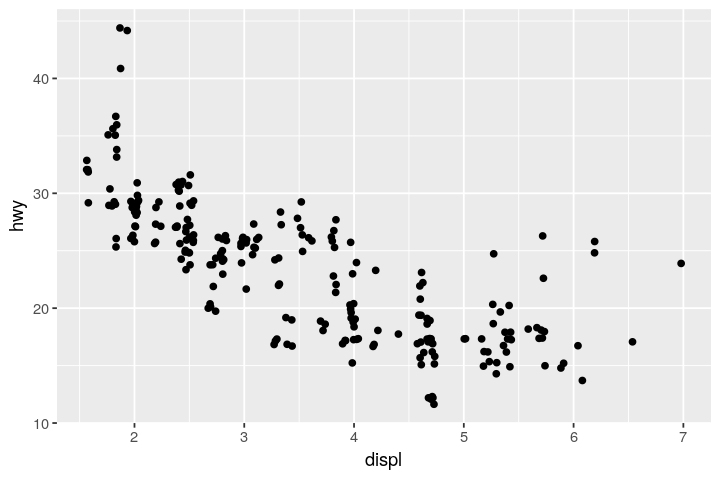

In [18]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

`geom_jitter` is just a shorthand for `geom_point(position = "jitter")`

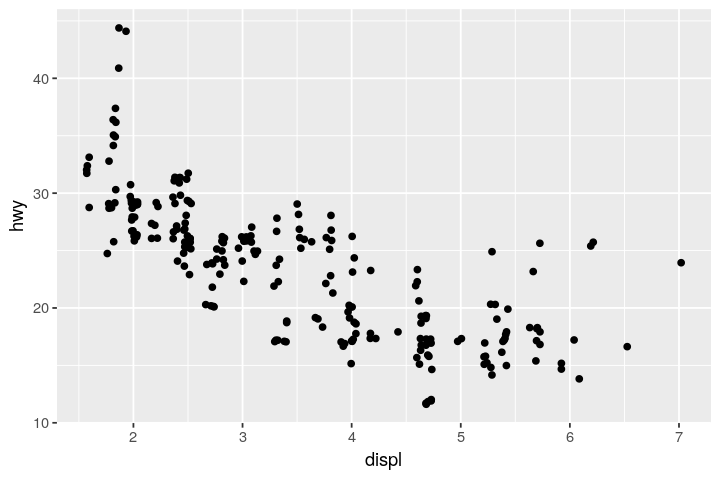

In [19]:
ggplot(data = mpg) +
    geom_jitter(mapping = aes(x = displ, y = hwy))

### Exercise
What happens if we use `position="jitter"` on a bar plot? 
What happens if we use `position="fill"` on a point plot?

# Coordinate Systems
Returning to the bar graph from above:

In [21]:
# set width so that the bars touch
bar <- ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut))

In some cases a horizontal bar chart might be desirable. This amounts to simply flipping the $x$ and $y$ axes. `ggplot` makes this easy:

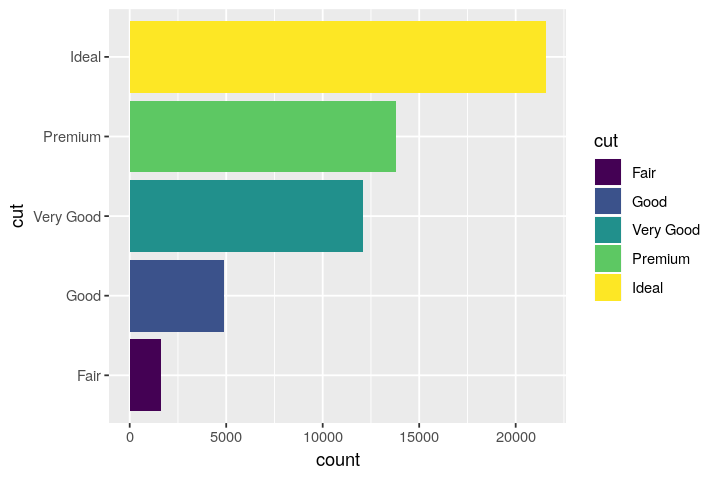

In [22]:
bar + coord_flip()

## Scale transformations
Almost all of the plots we've seen so far have been in *Cartesian coordinates*: moving along the $x$ or $y$ axis a given distance corresponds to a proportional increase in the respective variable.

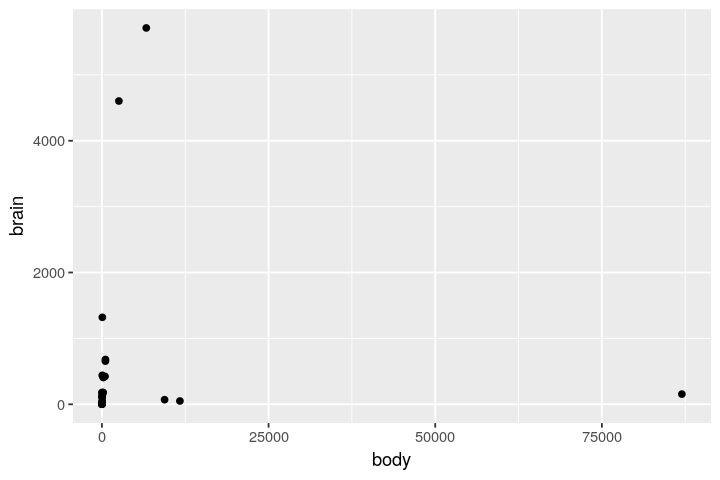

In [23]:
ggplot(MASS::Animals, aes(x = body, y = brain)) + geom_point()

Going *up* by two grid cells adds 4000 to `brain`. Going *right* by two grid cells adds 25k to `body`.

Now consider these data plotted on a log scale:

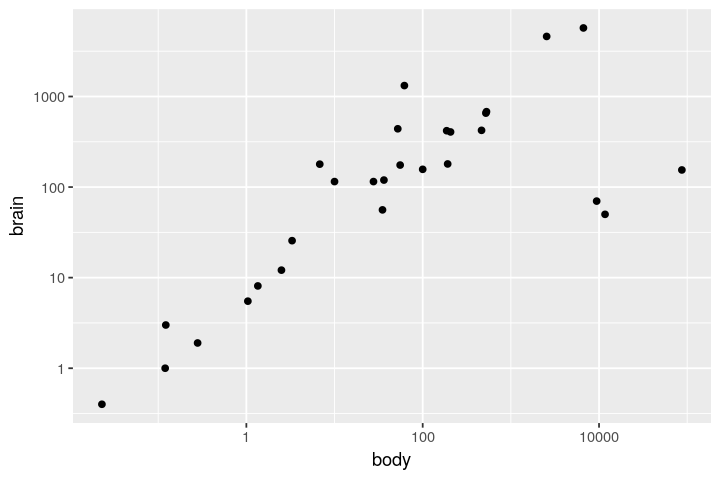

In [24]:
ggplot(MASS::Animals, aes(x = body, y = brain)) + geom_point() + scale_x_log10() + scale_y_log10()

Going *up* by two cells multiplies `brain` by 100. Going right by 2 cells multiplies `body` by 100. (This is equivalent to *adding* two to $\log_{10}(\texttt{body})$, etc.)

### Exercise
Recall the data on price vs. carat for the diamond data:

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


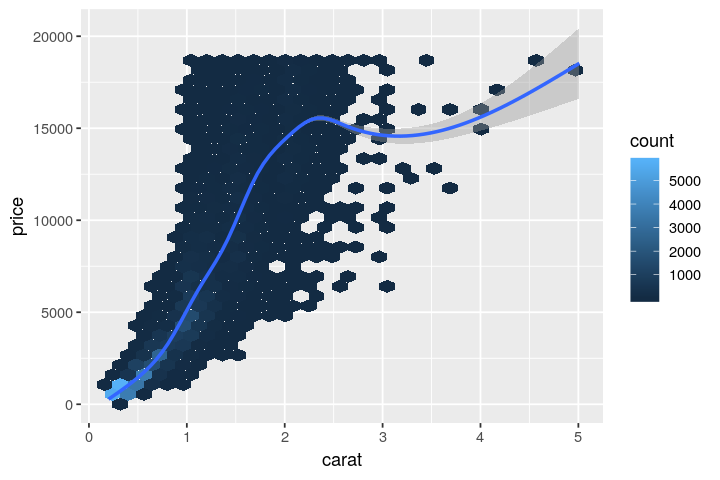

In [25]:
ggplot(diamonds, aes(carat, price)) + geom_hex() + geom_smooth()

Plot this data on using a log scale for each axis. (Add an interpretation to the Slack post if desired.)

## Pie charts
We've all seen them. Here is a classic specimen I got from online:
![pie chart](https://www.mrexcel.com/img/tech-tv/t15907.jpg)

A **pie chart** is a circular chart where the angle of each wedge is proportional to the frequency of each category. Mathematically, this amounts to mapping the $y$ coordinate (height) to angle (radians).

### Exercise
Use `coord_polar()` to map the $y$ axis to $\theta$ (the radians parameter.) (Hint: use `?coord_polar` to determine how to set $\theta=y$.)

In [26]:
# Your code here

Hrm, this is not quite what we wanted. It seems like it generated one "wedge" for each bar in the original graphic. Perhaps we can try stacking the five categories -- `Ideal`, `Premium`, `Very Good`, `Good`, and `Fair` -- on top of each other using a single bar, and then calling `coord_polar`.
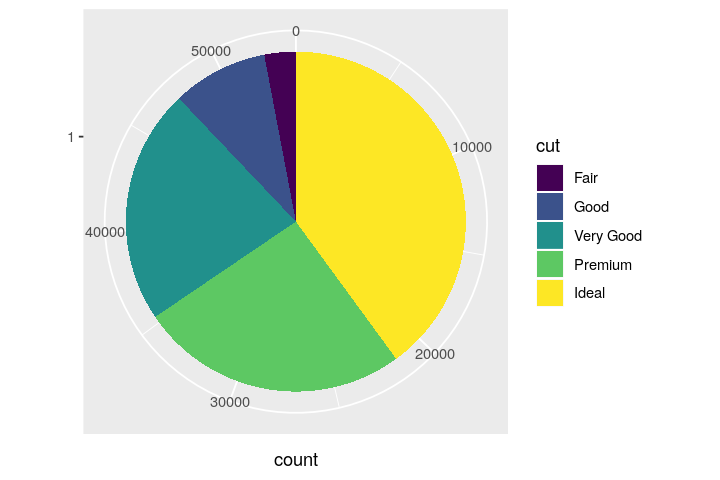

### The case against pie charts

How many times larger is the second circle?
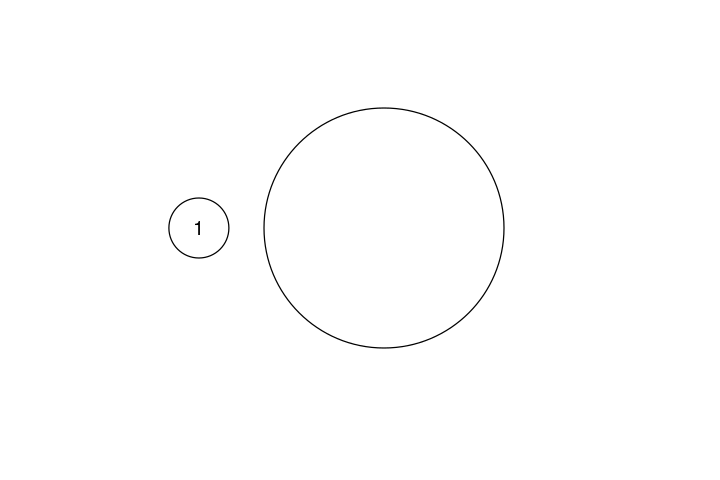


In [27]:
# Code here

# Facets
We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to add a third variable.

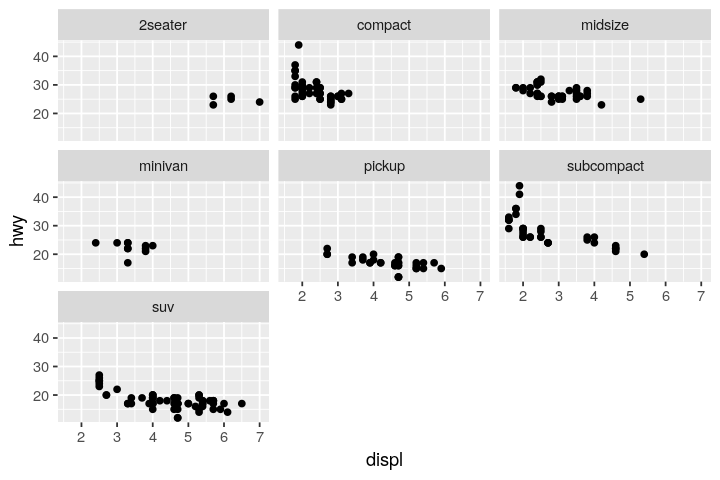

In [28]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class) # The ~ operator creates an R formula

The ``facet_wrap()`` command here told ggplot to generate a separate plot for each level of the discrete variable **class**. It also went ahead and arranged them into a nice 3x3 grid format.

The syntax to facet may look a little funny: 
```{r}
facet_wrap(~ class)
```
The tilde (``~``) at the beginning denotes what is called a **formula** in R. We will discuss formulas later in the class when we talk about modeling. For now, just keep in mind that the facet command must be written just so for things to work:

You should facet on a discrete variable. If you facet on a continuous variable, e.g., **cty**, R will discretize it first.

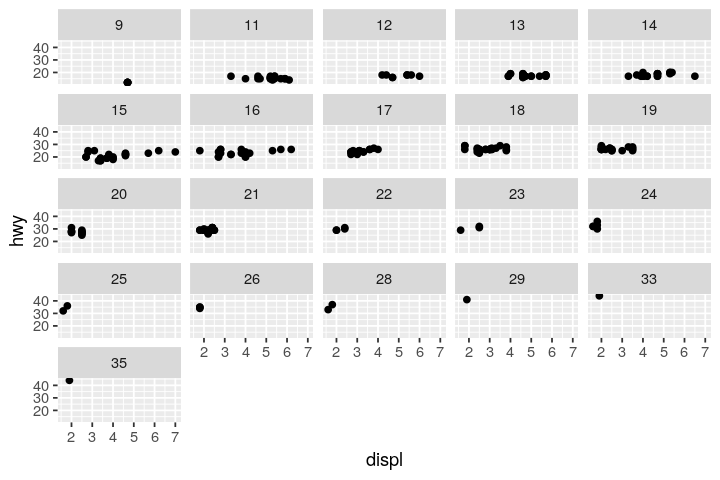

In [29]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ cty) 

### Exercise 
You can facet on a combination of variables by modifying the formula to include more variables.
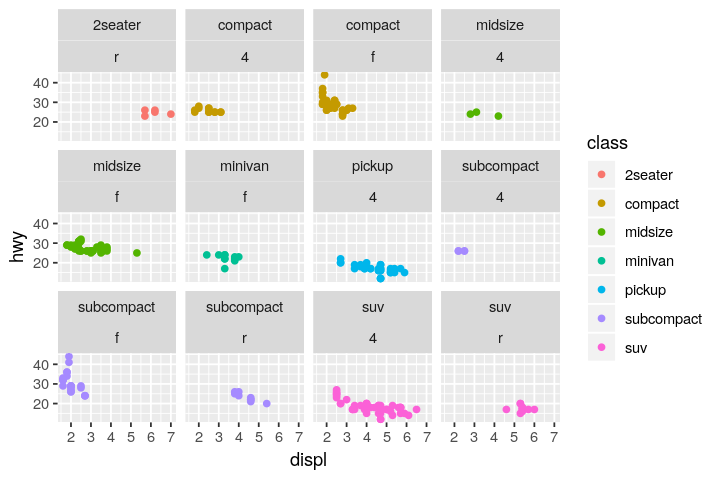

## The overall `ggplot` syntax
Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

## Labeling and titling
Adding labels and titles is extremely important when publishing plots. An uninterpretable plot is worse than no plot at all!
![bad plot](https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/mykland_fig1.jpg)
<caption> (Actual plot from a paper in a respected statistics journal.)</caption>
<small>Source: <a href="https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/">https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/</a></small>

("Exercise": reproduce this plot. For fun on your own time.)

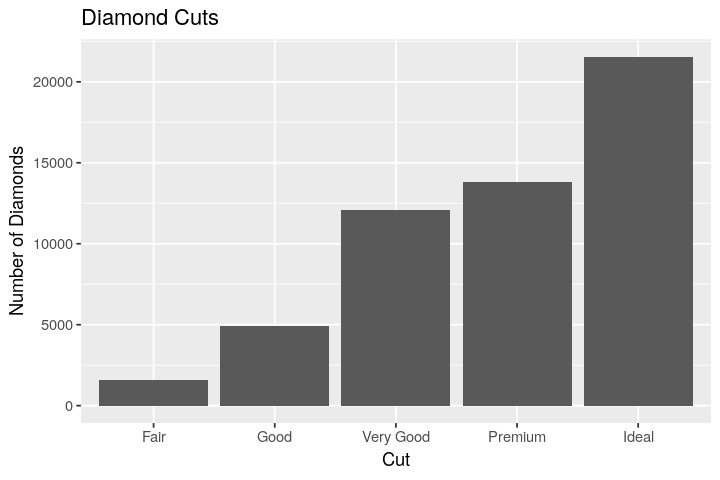

In [30]:
ggplot(diamonds) + geom_bar(aes(x=cut)) + ggtitle("Diamond Cuts") + 
   xlab("Cut") + ylab("Number of Diamonds")

## Real data example

In [31]:
midwest %>% print

# A tibble: 437 x 28
     PID county state  area poptotal popdensity popwhite popblack popamerindian
   <int> <chr>  <chr> <dbl>    <int>      <dbl>    <int>    <int>         <int>
 1   561 ADAMS  IL    0.052    66090      1271.    63917     1702            98
 2   562 ALEXA… IL    0.014    10626       759      7054     3496            19
 3   563 BOND   IL    0.022    14991       681.    14477      429            35
 4   564 BOONE  IL    0.017    30806      1812.    29344      127            46
 5   565 BROWN  IL    0.018     5836       324.     5264      547            14
 6   566 BUREAU IL    0.05     35688       714.    35157       50            65
 7   567 CALHO… IL    0.017     5322       313.     5298        1             8
 8   568 CARRO… IL    0.027    16805       622.    16519      111            30
 9   569 CASS   IL    0.024    13437       560.    13384       16             8
10   570 CHAMP… IL    0.058   173025      2983.   146506    16559           331
# ... with 427 more

In [32]:
midwest_top25 = midwest %>% select(county, state, percollege) %>% 
                            arrange(desc(percollege)) %>% top_n(25)
print(midwest_top25)

Selecting by percollege


# A tibble: 25 x 3
   county    state percollege
   <chr>     <chr>      <dbl>
 1 WASHTENAW MI          48.1
 2 DANE      WI          43.6
 3 DU PAGE   IL          42.8
 4 HAMILTON  IN          42.1
 5 CHAMPAIGN IL          41.3
 6 LAKE      IL          37.8
 7 MONROE    IN          37.7
 8 OZAUKEE   WI          37.4
 9 OAKLAND   MI          37.0
10 INGHAM    MI          36.8
# ... with 15 more rows


### Exercise (open-ended)
Improve the plot.

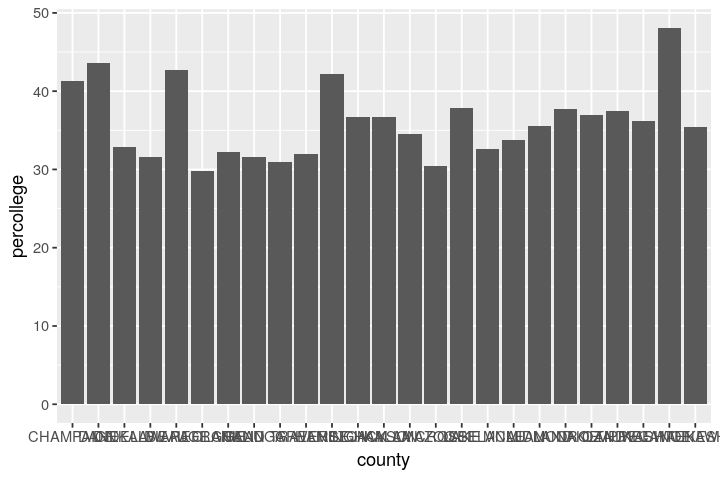

In [33]:
ggplot(midwest_top25) + geom_col(aes(x=county, y=percollege))